# Time Series Analysis: II

*S. R. Taylor (2024)*

This lecture and notebook are based on the "TimeSeries", and "TimeSeries2" lectures of of G. Richards' "Astrostatistics" class at Drexel University (PHYS 440/540, https://github.com/gtrichards/PHYS_440_540), which in turn are based on materials from Andy Connolly, and Ivezic et al. Chapter 10, and Andy Connolly's [blog](http://connolly.github.io/introAstroML/blog/regression.html).

##### Reading:

- [Textbook](http://press.princeton.edu/titles/10159.html) Chapter 10.
- ["Stochastic Modeling Handbook for Optical AGN Variability", Moreno et al. (2019)](https://iopscience.iop.org/article/10.1088/1538-3873/ab1597)
- ["Flexible and Scalable Methods for Quantifying Stochastic Variability in the Era of Massive Time-Domain Astronomical Data Sets", Kelly et al. (2014)](https://arxiv.org/abs/1402.5978)
- ["Autoregressive Times Series Methods for Time Domain Astronomy", Feigelson et al. (2019)](https://arxiv.org/abs/1901.08003)

---

## Contents
* [Stochastic Processes](#one)
* [Autoregressive Models](#two)
* [Power-spectral Density, and Autocorrelation, Autocovariance, & Structure Functions](#three)
* [Different Stochastic Processes](#four)
    
---

***Exercises required for class participation are in <font color='red'>red</font>.***

---

## Stochastic Processes <a class="anchor" id="one"></a>

If a system is always variable, but the variability is not (infinitely) predictable, then we have a [**stochastic**](https://en.wikipedia.org/wiki/Stochastic) process.  Counter to what you may think, these processes can also be characterized, but ***only statistically, not deterministically***.

Last time we saw that, even with so little data that we couldn't see the periodicity, it was still possible to apply machine learning to find the period. In the same way, we can find "structure" in otherwise random data.  For example the following light curves taken from [Moreno et al. (2019)](https://iopscience.iop.org/article/10.1088/1538-3873/ab1597) may all be random, but I think that we can agree that they are random in very different ways.

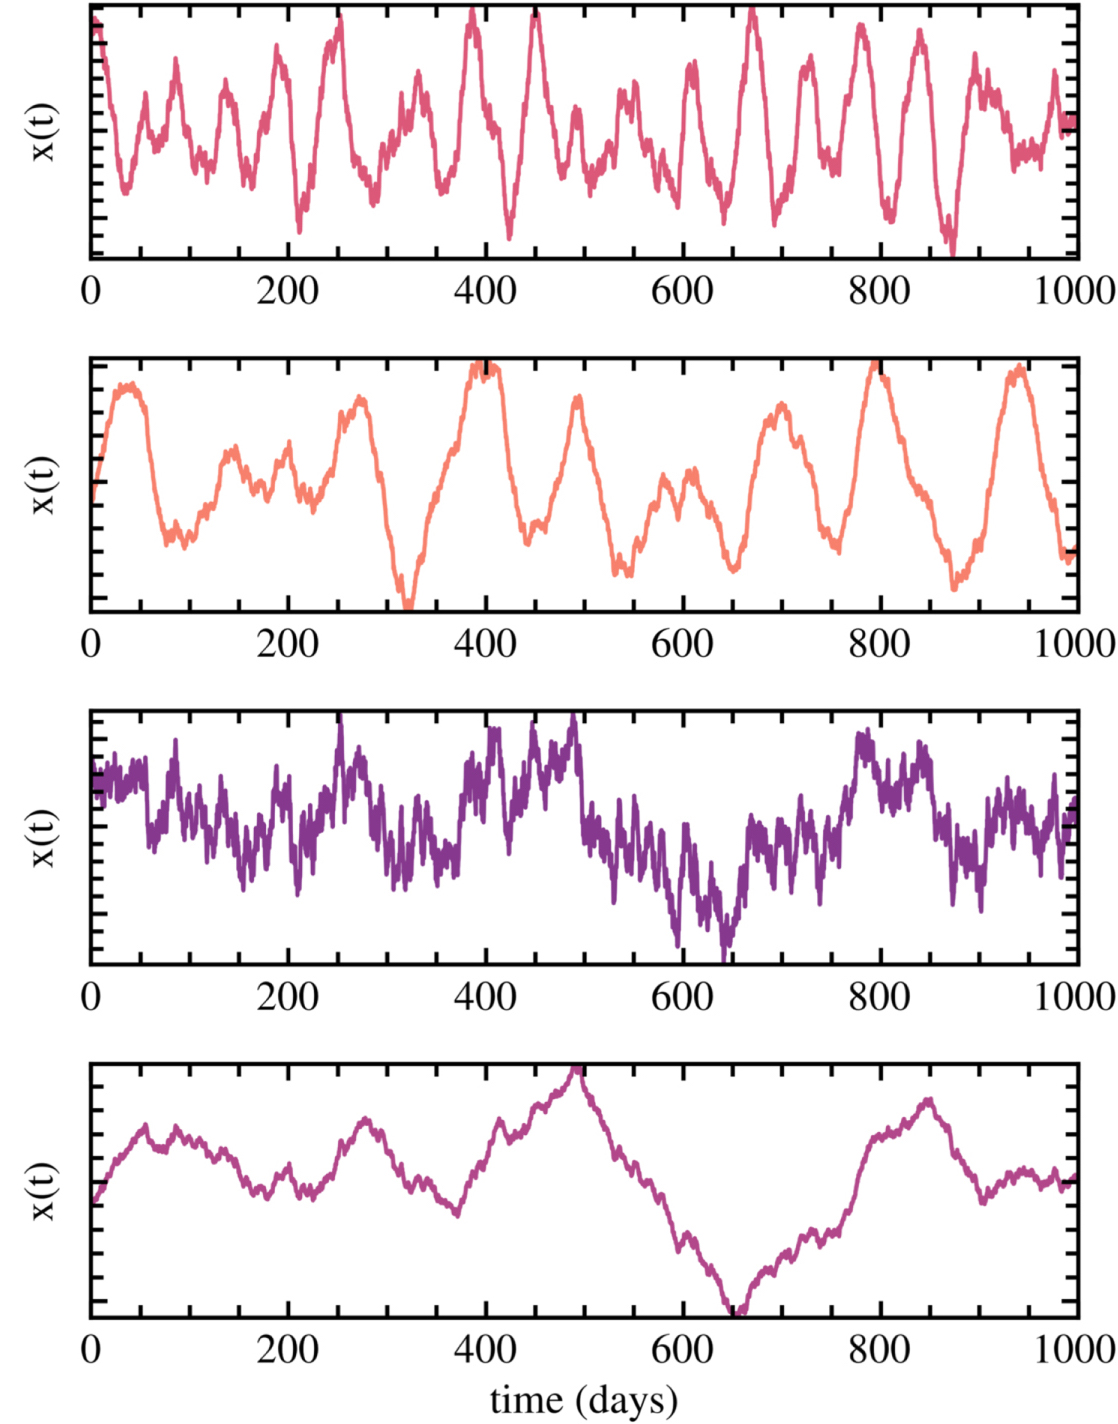

Depending on what one is trying to do, we can use a number of different tools to try to characterize the data: 

- Auto-Covariance Functions (ACVF), 
- Auto-Correlation Functions (ACF), 
- Power Spectral Densities (PSD), 
- Structure Functions (SF).  

In fact, these are all slightly different ways to describe the same information. But let's start by talking about **auto-regressive (AR)** and **moving-average (MA)** processes as building blocks of stochastic data.

## Autoregressive Models <a class="anchor" id="two"></a>

Processes that are not periodic, but that nevertheless "retain memory" of previous states, can be described in terms of **[autoregressive models](https://en.wikipedia.org/wiki/Autoregressive_model)**.

For ***linear regression***, we are predicting the dependent variable from the independent variable 

$$y = mx+b.$$  

For ***auto-regression***, the dependent and independent variable is the same and we are predicting a future value of $y$ based on a past (or multiple past) values of $y$:  

$$y_i = \phi_i y_{i-1} + \ldots,$$

where $\phi_i$ is the "lag coefficient".

A "**random walk**" is an example of such a process (with $\phi_i=1$); every new value is given by the preceeding value plus some noise:

$$y_i = y_{i-1} + \epsilon_i.$$

If $\phi_i>1$ then it is known as a **geometric random walk**, which is typical of the stock market (a largely random process that nevertheless increases with time [on long time scales]). (So, if you ever interview for a quant position on Wall Street, tell them that you are an expert in using autoregressive geometric random walks to model stochastic processes.)

In the random walk case, each new value depends only on the immediately preceeding value. But we can generalize this to include $p$ values:

$$y_i = \sum_{j=1}^p a_j y_{i-j} + \epsilon_i$$

We refer to this as an [**autoregressive (AR)**](https://en.wikipedia.org/wiki/Autoregressive_model) process of order $p$: $AR(p)$. For a random walk, we have $p=1$, and $a_1=1$ (where now I'm using $a$ instead of $\phi$ to match the notation of the textbook).

If the data are drawn from a "stationary" process (one where it doesn't matter what region of the light curve you sample [so long as it is representative], the stock market *not* being an example of a stationary process), the $a_j$ satisfy certain conditions. One example analysis we could do with some data is to ask whether a system is more consistent with $a_1=0$ or $a_1=1$ (noise vs. a random walk).

We'll try to understand what an AR process is doing by following what happens after introducing a single "spike" at time, $t=3$.  These plots show what happens over the next 17 time periods for both an AR(1) and an AR(2) process with different lag coefficients; see [Moreno et al. (2019)](https://iopscience.iop.org/article/10.1088/1538-3873/ab1597). Remember, the $\phi$ notation here maps to the $a$ coefficients of the textbook.

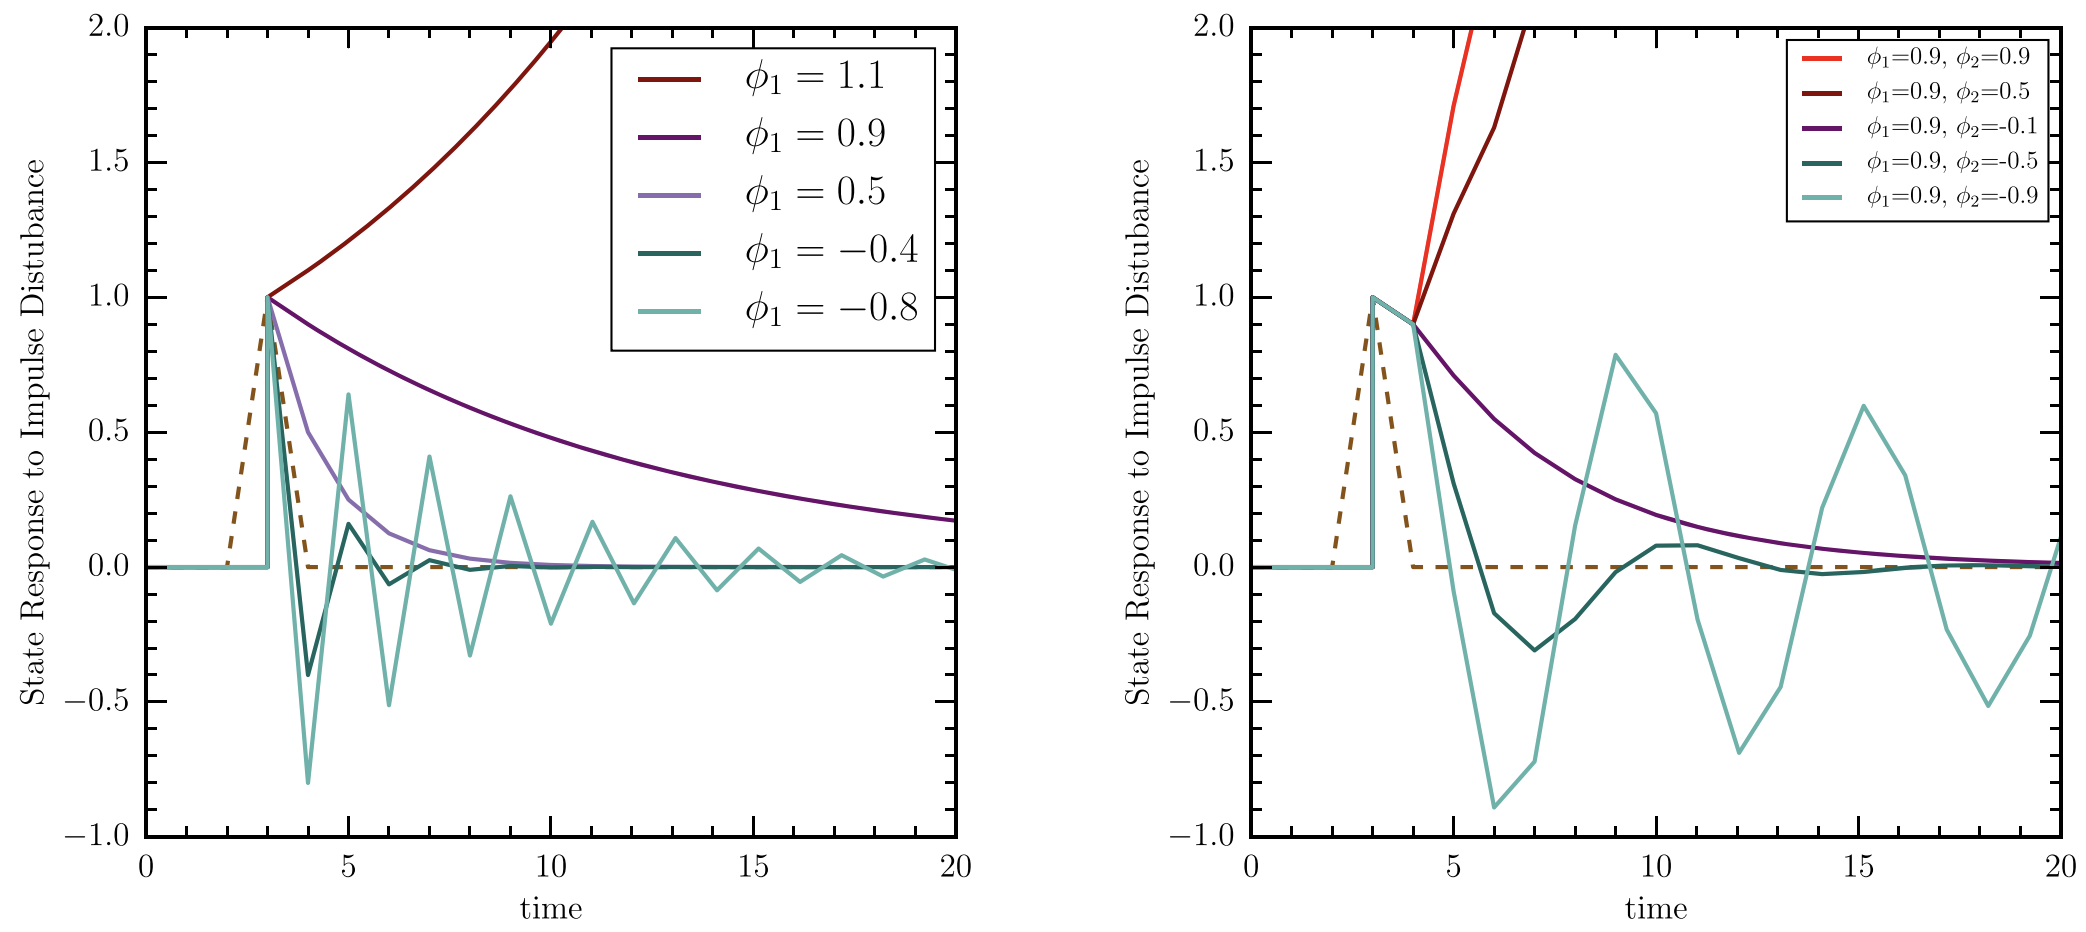

**You can see that higher $p$ AR processes retain longer term memory, creating longer timescale structure in the data that has excess power on lower sampling frequencies.** 

Below are some example light curves for specific $AR(p)$ processes.  These are similar to the above, but now instead of one noise spike we have many spread over time.  

- In the first example, $AR(0)$, the light curve is simply responding to noise fluctuations.  
- In the second example, $AR(1)$, the noise fluctuation responses are persisting for slightly longer as the next time step depends positively on the time before.  
- For the 3rd example, nearly the full effect of the noise spike from the previous time step is applied again, giving particularly long and high chains of peaks and valleys.  
- In the 4th example, $AR(2)$, we have long, but low chains of peaks and valleys as a spike persists for an extra time step.  
- Finally, in the 5th example, the response of a spike in the second time step has the opposite sign as for the first time step, and both have large coefficients, so the peaks and valleys are both quite high and quite narrowly separated.

![AR Examples](https://upload.wikimedia.org/wikipedia/commons/thumb/c/ce/ArTimeSeries.svg/1000px-ArTimeSeries.svg.png)

A [**moving average (MA)**](https://en.wikipedia.org/wiki/Moving-average_model) process is similar to an AR process, but instead **the value at each time step depends not on the *value* of previous time step, but rather the *perturbations* from previous time steps**.  *(In finance, instead of inter-day stock prices, we are now modeling intra-day stock prices.)* 

MA processes are defined by

$$y_i = \epsilon_i + \sum_{j=1}^qb_j\epsilon_{i-j}.$$

So, for example, an MA(q=1) process would look like
$$y_i = \epsilon_{i} + b_1\epsilon_{i-1},$$

whereas an AR(p=2) process would look like

$$y_i = a_1y_{i-1} +  a_2y_{i-2} + \epsilon_i$$

Thus in an $MA$ process a "shock/impulse" affects only the current value and $q$ values into the future.  In an $AR$ process a "shock/impulse" affects *all* future values.  These two plots from Moreno et al. show the difference between an MA(1) process and an AR(1) ("random walk") process:

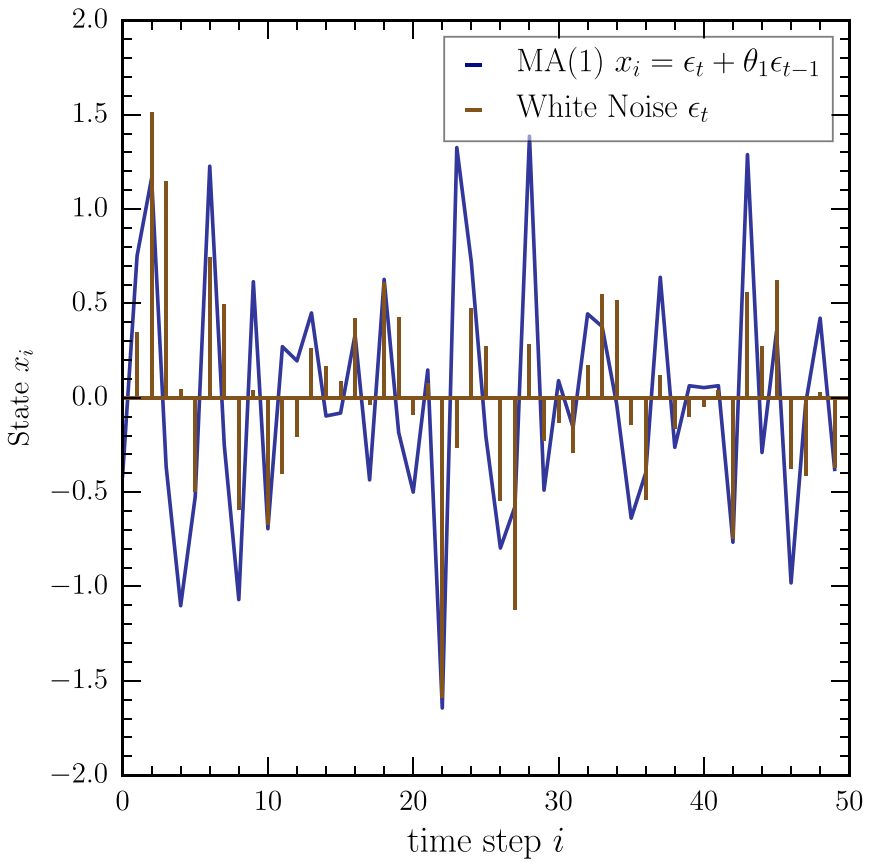

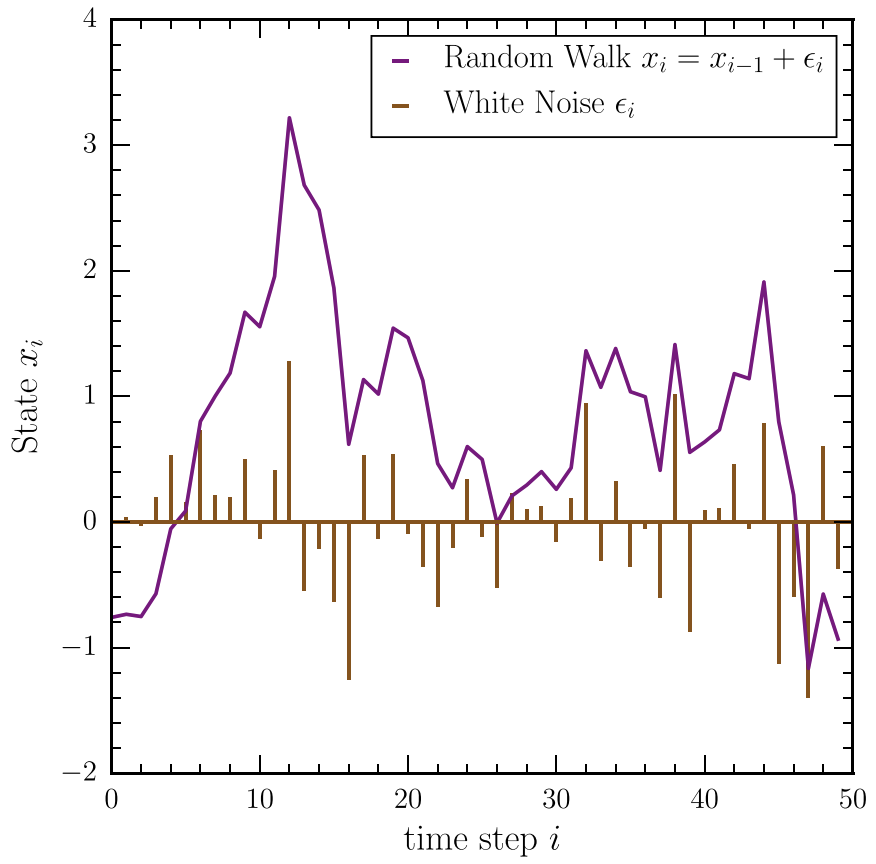

We can also ***combine AR(p) and MA(q) processes into ARMA(p,q)*** to characterize more complicated data. For example an ARMA(2,1) model combines AR(2) and MA(1):

$$y_i = a_1y_{i-1} +  a_2y_{i-2} + \epsilon_i + b_1 \epsilon_{i-1}.$$

Below is some code and a plot that illustrates this. <font color='red'>Try changing the coefficients (in the yAR, yMA, and yARMA equations) and see what happens.  (You may need to change the plot limits depending on your choices.)</font>

In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'

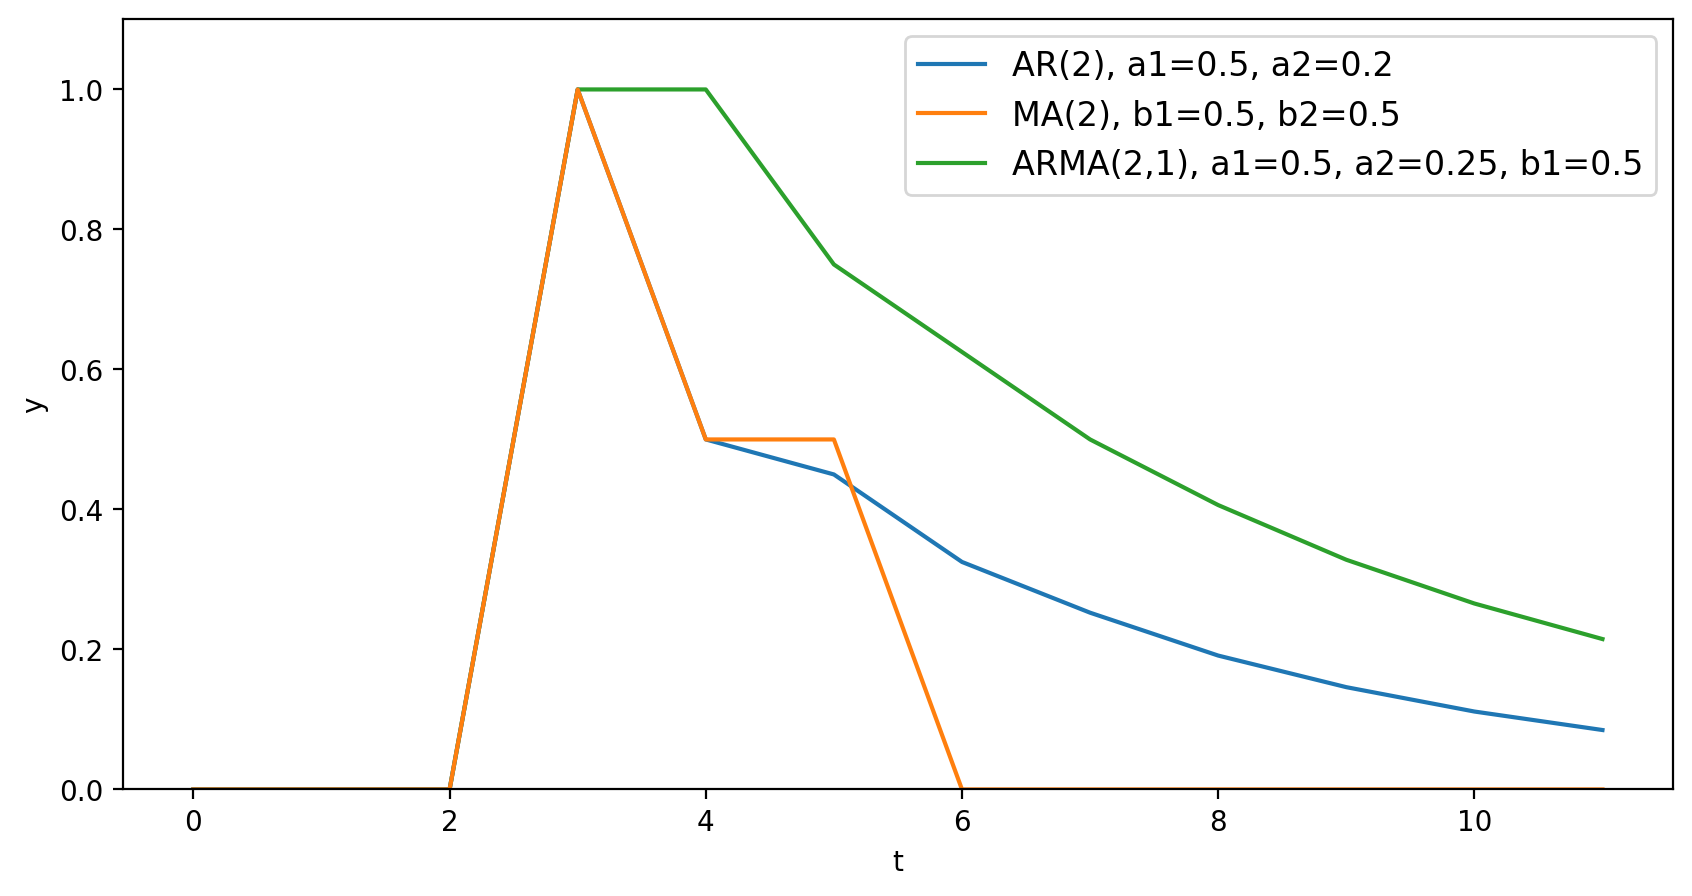

In [2]:
from matplotlib.ticker import MultipleLocator

N = 10

#epsilon = np.array([0,0,0,1,0,0,
#                    0,0,0,0,0,0])
epsilon = np.zeros(N+2)
epsilon[3] = 1

yAR = np.zeros(N+2)
yMA = np.zeros(N+2)
yARMA = np.zeros(N+2)

for i in np.arange(N)+2:
    # Complete
    yAR[i] = 0.5*yAR[i-1] + 0.2*yAR[i-2] + epsilon[i]
    yMA[i] = epsilon[i] + 0.5*epsilon[i-1] + 0.5*epsilon[i-2]
    yARMA[i] = 0.25*yARMA[i-2] + 0.5*yARMA[i-1] + epsilon[i] + 0.5*epsilon[i-1] 
    #print i, yAR[i], yMA[i]

###
fig = plt.figure(figsize=(10, 5))

t = np.arange(len(yAR))
plt.plot(t,yAR,label="AR(2), a1=0.5, a2=0.2")
plt.plot(t,yMA,label="MA(2), b1=0.5, b2=0.5")
plt.plot(t,yARMA,label="ARMA(2,1), a1=0.5, a2=0.25, b1=0.5",zorder=0)

plt.xlabel("t")
plt.ylabel("y")
plt.legend(loc="upper right",
           prop={'size':12})
plt.ylim([0,1.1])

plt.show()

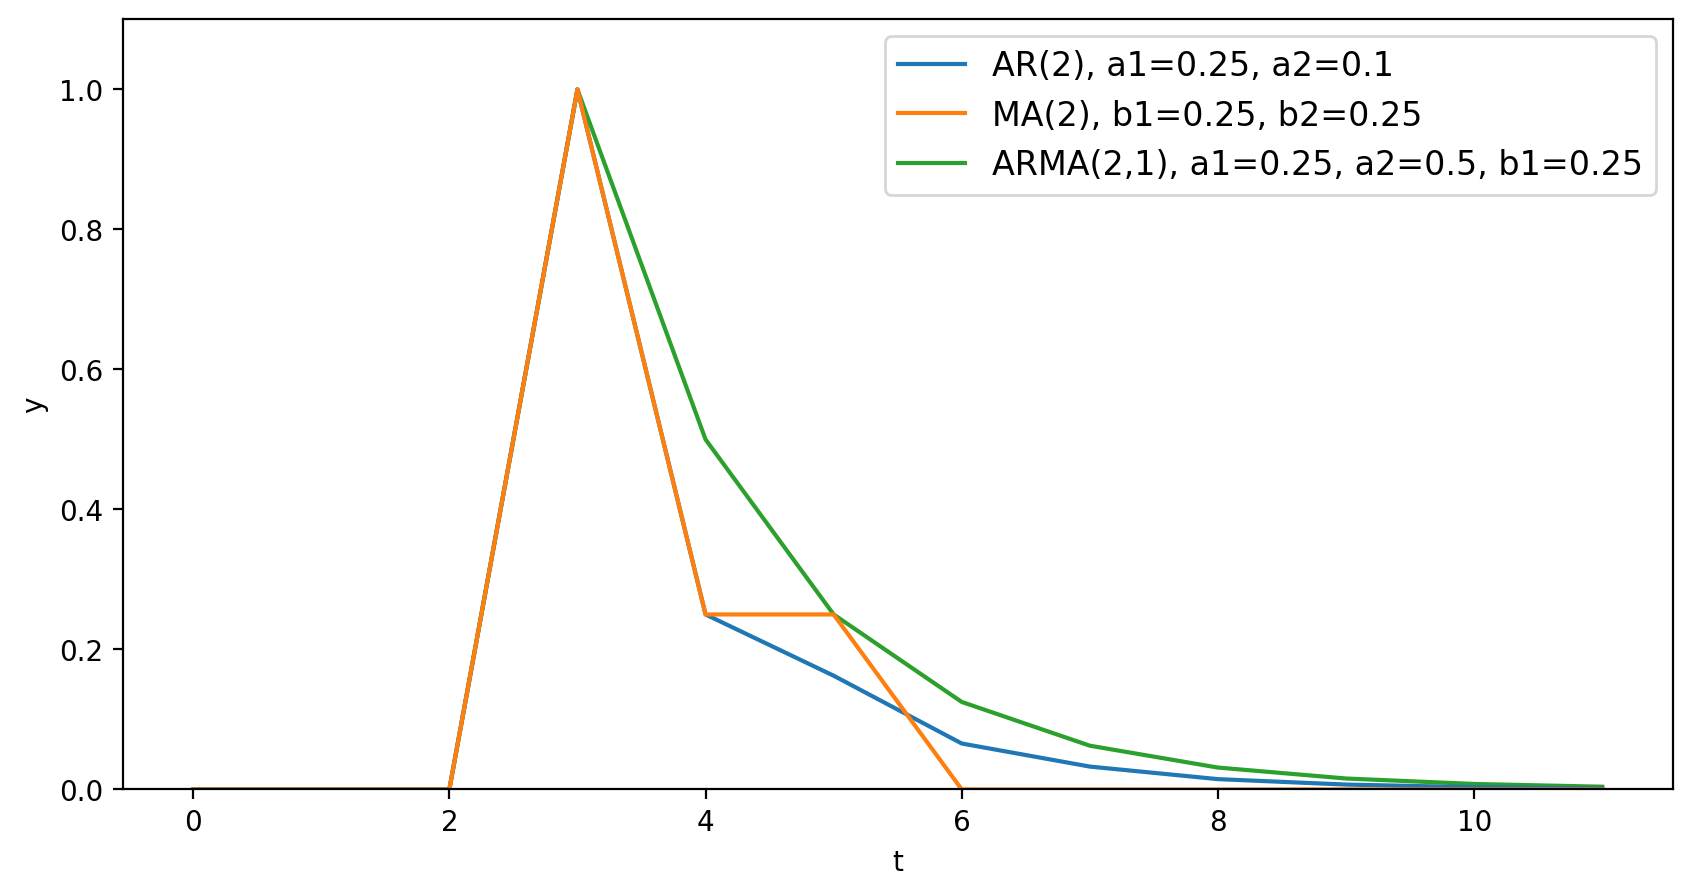

In [3]:
from matplotlib.ticker import MultipleLocator

N = 10

#epsilon = np.array([0,0,0,1,0,0,
#                    0,0,0,0,0,0])
epsilon = np.zeros(N+2)
epsilon[3] = 1

yAR = np.zeros(N+2)
yMA = np.zeros(N+2)
yARMA = np.zeros(N+2)

for i in np.arange(N)+2:
    # Complete
    yAR[i] = 0.25*yAR[i-1] + 0.1*yAR[i-2] + epsilon[i]
    yMA[i] = epsilon[i] + 0.25*epsilon[i-1] + 0.25*epsilon[i-2]
    yARMA[i] = 0.125*yARMA[i-2] + 0.25*yARMA[i-1] + epsilon[i] + 0.25*epsilon[i-1] 
    #print i, yAR[i], yMA[i]

###
fig = plt.figure(figsize=(10, 5))

t = np.arange(len(yAR))
plt.plot(t,yAR,label="AR(2), a1=0.25, a2=0.1")
plt.plot(t,yMA,label="MA(2), b1=0.25, b2=0.25")
plt.plot(t,yARMA,label="ARMA(2,1), a1=0.25, a2=0.5, b1=0.25",zorder=0)

plt.xlabel("t")
plt.ylabel("y")
plt.legend(loc="upper right",
           prop={'size':12})
plt.ylim([0,1.1])

plt.show()

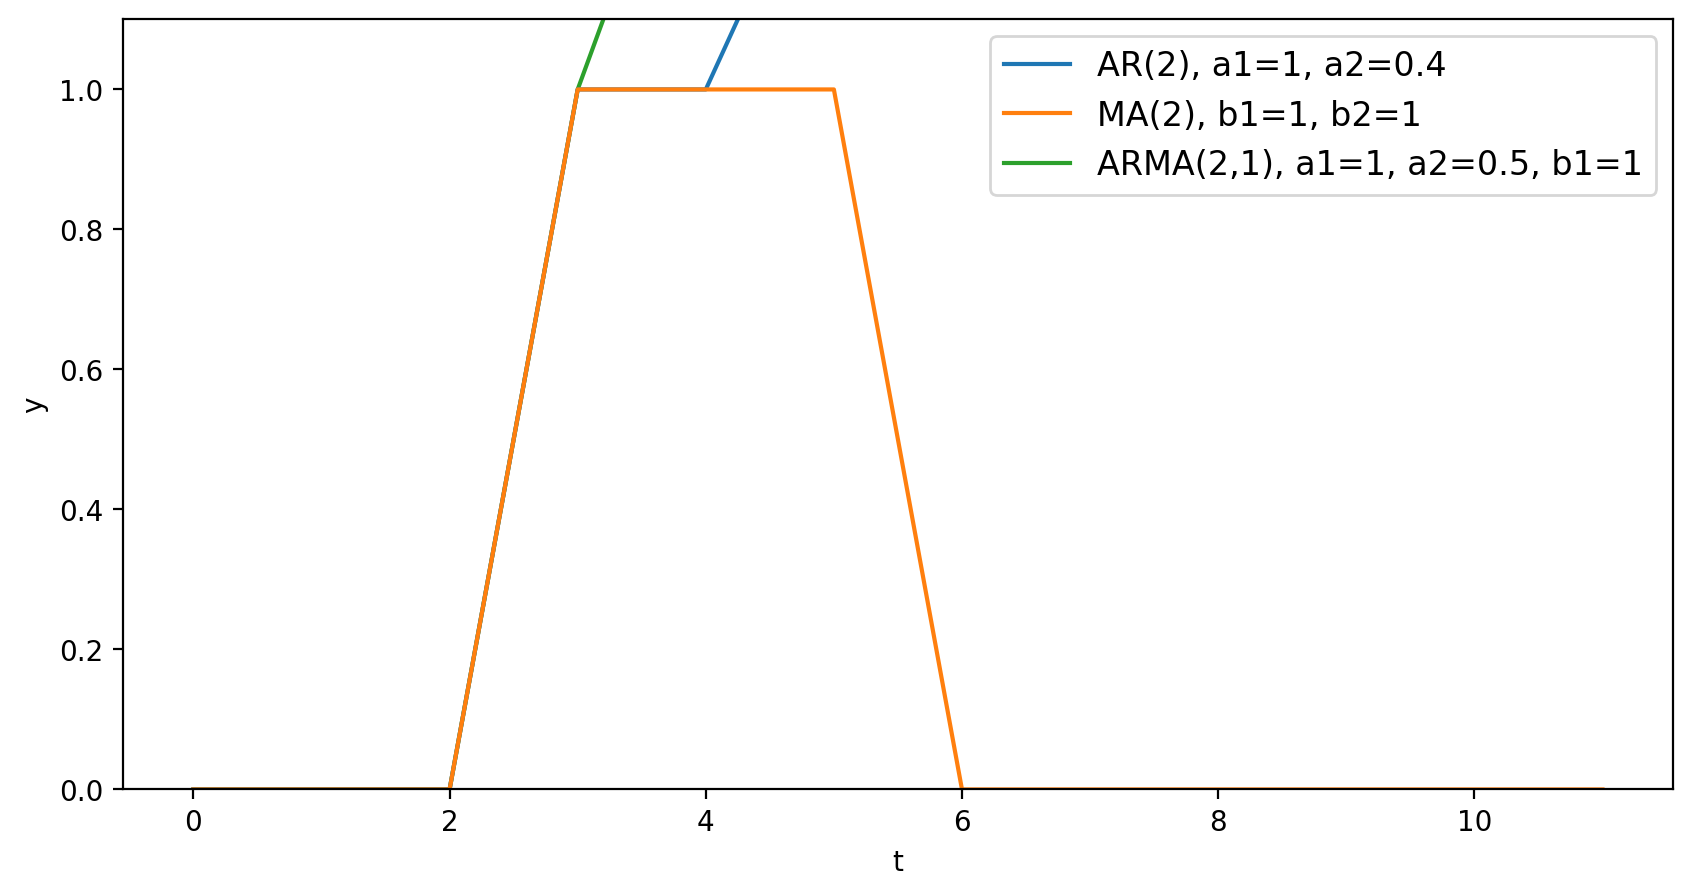

In [3]:
from matplotlib.ticker import MultipleLocator

N = 10

#epsilon = np.array([0,0,0,1,0,0,
#                    0,0,0,0,0,0])
epsilon = np.zeros(N+2)
epsilon[3] = 1

yAR = np.zeros(N+2)
yMA = np.zeros(N+2)
yARMA = np.zeros(N+2)

for i in np.arange(N)+2:
    # Complete
    yAR[i] = 1*yAR[i-1] + 0.4*yAR[i-2] + epsilon[i]
    yMA[i] = epsilon[i] + 1*epsilon[i-1] + 1*epsilon[i-2]
    yARMA[i] = 0.5*yARMA[i-2] + 1*yARMA[i-1] + epsilon[i] + 0.5*epsilon[i-1] 
    #print i, yAR[i], yMA[i]

###
fig = plt.figure(figsize=(10, 5))

t = np.arange(len(yAR))
plt.plot(t,yAR,label="AR(2), a1=1, a2=0.4")
plt.plot(t,yMA,label="MA(2), b1=1, b2=1")
plt.plot(t,yARMA,label="ARMA(2,1), a1=1, a2=0.5, b1=1",zorder=0)

plt.xlabel("t")
plt.ylabel("y")
plt.legend(loc="upper right",
           prop={'size':12})
plt.ylim([0,1.1])

plt.show()

These videos may be helpful in trying to understand these processes.

- **[MA(1)](https://www.youtube.com/watch?v=lUhtcP2SUsg)**

- **[AR(1)](https://www.youtube.com/watch?v=AN0a58F6cxA)**

- **[ARMA(1,1)](https://www.youtube.com/watch?v=Pg0RnP1uLVc)**

### CARMA Models

$AR$ and $ARMA$ models assume evenly sampled time-series data. However, **we can extend this to unevenly sampled data with $CAR$ or $CARMA$ processes, where the $C$ stands for *continuous***.  

A $CAR(1)$ process is described by a **stochastic differential equation** which includes a damping term that pushes $y(t)$ back towards the mean, so it is also called a **damped random walk (DRW)**. DRWs are encountered extensively in modeling intrinsic photometric variability of AGNs.

For evenly sampled data a CAR(1) process is the same as an AR(1) process with $a_1=\exp(-1/\tau)$. That is, the next value is the previous value times the damping factor (plus noise).

---

## Power-spectral Density, and Autocorrelation, Autocovariance & Structure Functions <a class="anchor" id="three"></a>

We'll skip the steps that would take us smoothly from AR, MA, ARMA, and CARMA modeling to ACVF, ACF, PSD, and SFs, but you can read about it in detail in Moreno et al. (2019) and the other papers linked at the top of the notebook. However, I'll also introduce these with a simple illustration.

Take a (stochastically varying) quasar which has both *line* and *continuum* emission and where the line emission is stimulated by the continuum.  Since there is a physical separation between the regions that produce each type of emission, we get a delay between the light curves as can be seen here:

![Peterson 2001, RM](https://ned.ipac.caltech.edu/level5/Sept01/Peterson2/Figures/figure24.jpg)

You can think of this as looking at a (flickering) lamp both directly (top plot) and reflected off of a mirror that is some distance away from the lamp (bottom). The lamp image is (largely) the same, just shifted by the light travel time for the extra distance covered.

Let's compute the **[correlation function](https://en.wikipedia.org/wiki/Correlation_function)** for this process.  A correlation function (Ivezic $\S$ 6.5) gives us information about the time delay between 2 processes.  If one time series is derived from another simply by shifting the time axis by $t_{\rm lag}$, then their correlation function will have a peak at $\Delta t = t_{\rm lag}$.

**The correlation function between time series $f(t)$ and $g(t)$ is defined as**

$${\rm CF}(\Delta t) = \frac{\lim_{T\rightarrow \infty}\frac{1}{T}\int_T f(t)\,g(t+\Delta t)dt }{\sigma_f \sigma_g}$$

- *Computing the correlation function is basically the mathematical processes of convolution*, i.e., sliding the two curves over each other and computing the degree of similarity for each step in time. 
- The peak of the correlation function reveals the time delay between the processes. 
- Without the denominator normalization by the standard deviations of the processes, this is the **covariance function**. 

Below we have the correlation function of the line and continuum emission from a quasar, which reveals a $\sim$ 15 day delay between the two.

![Peterson 2001, RM](https://ned.ipac.caltech.edu/level5/Sept01/Peterson2/Figures/figure25.jpg)

In an **autocorrelation function (ACF)**, we take our correlation function from above and set $f(t)= g(t)$.  Then we are revealing information about variability timescales present in the process itself.

### What can the ACF tell us?

1. If the values of $y$ are uncorrelated, then ACF$(\Delta t)=0$ (except for ACF$(0)=1$, by definition).


2. For processes that "retain memory" of previous states only for some characteristic time $\tau$, the ACF will vanish for $\Delta t \gg \tau$ -- much in the same way that an AR response dies out after some time.


3. Turning that around, the predictability of future behavior of such a process is limited to times up to $\sim \tau$; you have to "let the process run" to know how it will behave at times longer than that.

### Power Spectral Density

The Fourier Transform of an ACF is the **[Power Spectral Density (PSD)](https://en.wikipedia.org/wiki/Spectral_density)**.  So, the PSD is an analysis in frequency space and the ACF is in time space. 

The **[Wiener-Khinchin theorem](https://www.wikiwand.com/en/Wiener%E2%80%93Khinchin_theorem)** describes the fact that the ACVF (autocovariance function; just the ACF without the standard-deviation denominator) and PSD are a Fourier pair. 

> $$ \mathrm{PSD}(f) = \int_{-\infty}^\infty \mathrm{ACVF}(\Delta t)\,\exp(-2\pi i f\tau)\,d\Delta t $$

for a lag time of $\Delta t$ between observation. For example, for a sinusoidal function in time space, the ACF/ACVF will have the same period, $T$, as the function. Conversly, the PSD in frequency space will be a $\delta$ function centered on $\omega = 1/2\pi T$ (think about our Lomb-Scargle periodogram for a sine wave from last time).

### The Structure Function

The **structure function** is another quantity that is frequently used in astronomy and is related to the ACF:

$${\rm SF}(\Delta t) = {\rm SF}_\infty[1 - {\rm ACF}(\Delta t)]^{1/2},$$

where ${\rm SF}_\infty$ is the standard deviation of the time series as evaluated on timescales much larger than any charateristic timescale, $\tau$.

- The ACF for a Damped Random Walk (DRW) is given by
$$ \mathrm{ACF}(t) = \exp(-t/\tau),$$
where $\tau$ is the characteristic timescale (i.e., the damping timescale). Remember that a DRW modeled as an AR(1) has $a_1=\exp(-1/\tau)$.


- The structure function can be written as
$$ \mathrm{SF}(t) = \mathrm{SF}_{\infty}[1-\exp(-t/\tau)]^{1/2}.$$


- The PSD is for a DRW is
$$ \mathrm{PSD}(f) = \frac{\tau^2 SF_{\infty}^2}{1+(2\pi f \tau)^2},$$
which is $1/f^2$ at high frequencies but flat at low frequencies (hence, "damped").


The ACF example above was an example of a DRW: the light curve is strongly correlated a short timescales, but uncorrelated at long timescales.   This is observed in optical variability of quasar continuum light; in fact, it works so well that one can use this model to distinguish quasars from stars, based solely on the variability they exhibit.

> More generically, if ${\rm SF} \propto t^{\alpha}$, then ${\rm PSD} \propto \frac{1}{f^{1+2\alpha}}$.

Thus an analysis of a stochastic system can be done with either the ACF, SF, or PSD; they are all relatable.

The structure function is interesting because it's equal to the standard deviation of the distribution of the differences of $y(t_2) - y(t_1)$ evaluated at many different $t_1$ and $t_2$ (i.e., with a time lag of $\Delta t = t_2 - t_1$), and divided by $\sqrt 2$. This is of practical use: if I have a series of observations $y_i$ (taken at random times $t_i$) it's relatively straighforward to compute the structure function.

###  Structure Function for Damped Random Walk

See [MacLeod et al. (2010)](https://arxiv.org/abs/1004.0276).

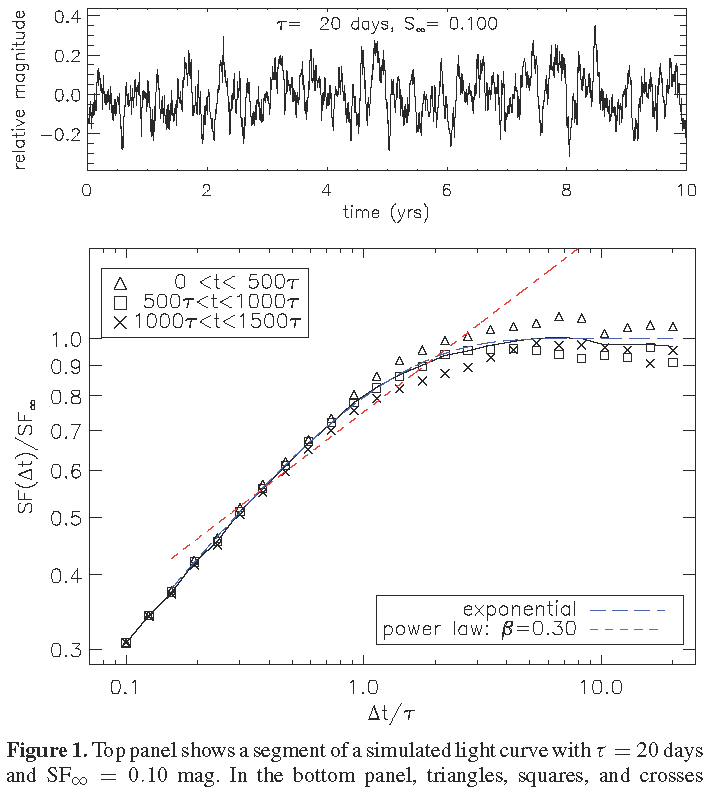

---

## Different stochastic processes <a class="anchor" id="four"></a>

* A **stochastic process with a $1/f^2\,$ PSD is known as random walk** (if discrete) or Brownian motion (or, more accurately, Wiener process) if continuous. 
    - These physically occur when the value being observed is subjected to a series of independent changes of similar size. 
    - It's also sometimes called "red noise" (although in my field the term red noise means any PSD with excess power at low frequencies). 
    - Quasar variability exhibits $1/f^2$ properties at high frequencies (that is, short time scales, below a year or so). 


* **Stochastic processes with $1/f\,$ PSDs are sometimes called "long-term memory processes"** (also sometimes know as "pink noise"). 
    - They have equal energy at all octaves (or over any other logarithmic frequency interval). 
    - This type of process has infinite variance and an undefined mean (similar to a Lorentzian distribution). 


* A process with a **constant PSD is frequently referred to as "white noise"** -- it has equal intensity at all frequencies. 
    - This is a process with no memory -- each measurement is independent of all others. 

<font color='red'>Let's play with the code below to make a plot of counts vs. time and of the PSD vs. frequency for both a $1/f$ and a $1/f^2$ process.</font> 

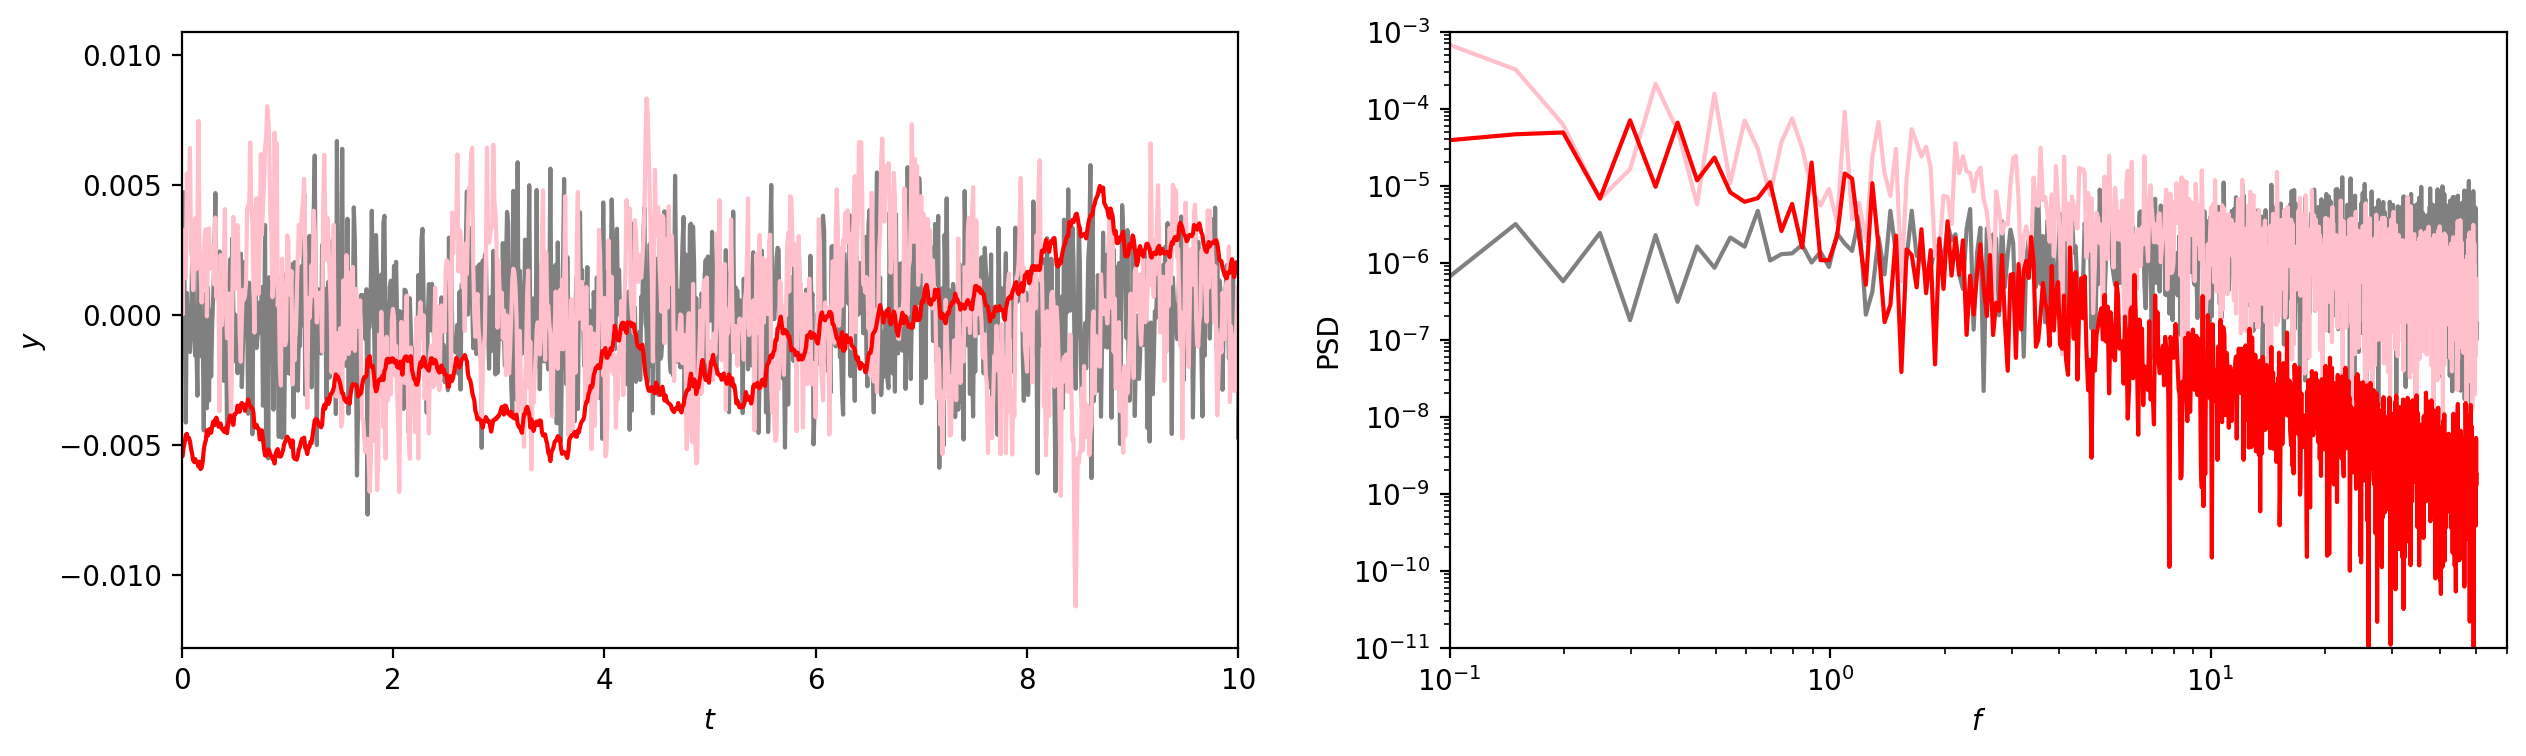

In [4]:
from astroML.time_series import generate_power_law
from astroML.fourier import PSD_continuous

N = 2014
dt = 0.01
betaRed = 2  # Complete
betaPink = 1  # Complete
betaWhite = 0  # Complete

t = dt * np.arange(N)

yRed = generate_power_law(N, dt, betaRed)
yPink = generate_power_law(N, dt, betaPink) # Complete
yWhite = generate_power_law(N, dt, betaWhite)/10.0 # Complete

fRed, PSDred = PSD_continuous(t, yRed) # Complete
fPink, PSDpink = PSD_continuous(t, yPink) # Complete
fWhite, PSDwhite = PSD_continuous(t, yWhite) # Complete
    
fig = plt.figure(figsize=(15, 4))
ax1 = fig.add_subplot(121)
ax1.plot(t, yWhite, c='Grey')
ax1.plot(t, yPink, c='Pink')
ax1.plot(t, yRed, '-r')
ax1.set_xlim(0, 10)
ax1.set_ylabel('$y$')
ax1.set_xlabel('$t$')

ax2 = fig.add_subplot(122, xscale='log', yscale='log')
ax2.plot(fWhite, PSDwhite, c='Grey')   
ax2.plot(fPink, PSDpink, c='Pink')  
ax2.plot(fRed, PSDred, '-r')  
ax2.set_xlim(1E-1, 60)
ax2.set_ylim(1E-11, 1E-3)
ax2.set_ylabel('PSD')
ax2.set_xlabel('$f$')

plt.show()

You should find that, because the power at high frequency is larger for $1/f$, that light curve will look noisier.

We can even *hear* the difference:
[https://www.youtube.com/watch?v=5KdRL2fkxgU&feature=emb_logo](https://www.youtube.com/watch?v=5KdRL2fkxgU&feature=emb_logo)

<font color='red'>Let's compare these in both time and frequency space.</font>

/home/hoelsczj/miniconda3/envs/SNR/lib/python3.10/site-packages/astroML/linear_model/linear_regression_errors.py:10: UserWarning: LinearRegressionwithErrors requires PyMC3 to be installed
  warnings.warn('LinearRegressionwithErrors requires PyMC3 to be installed')


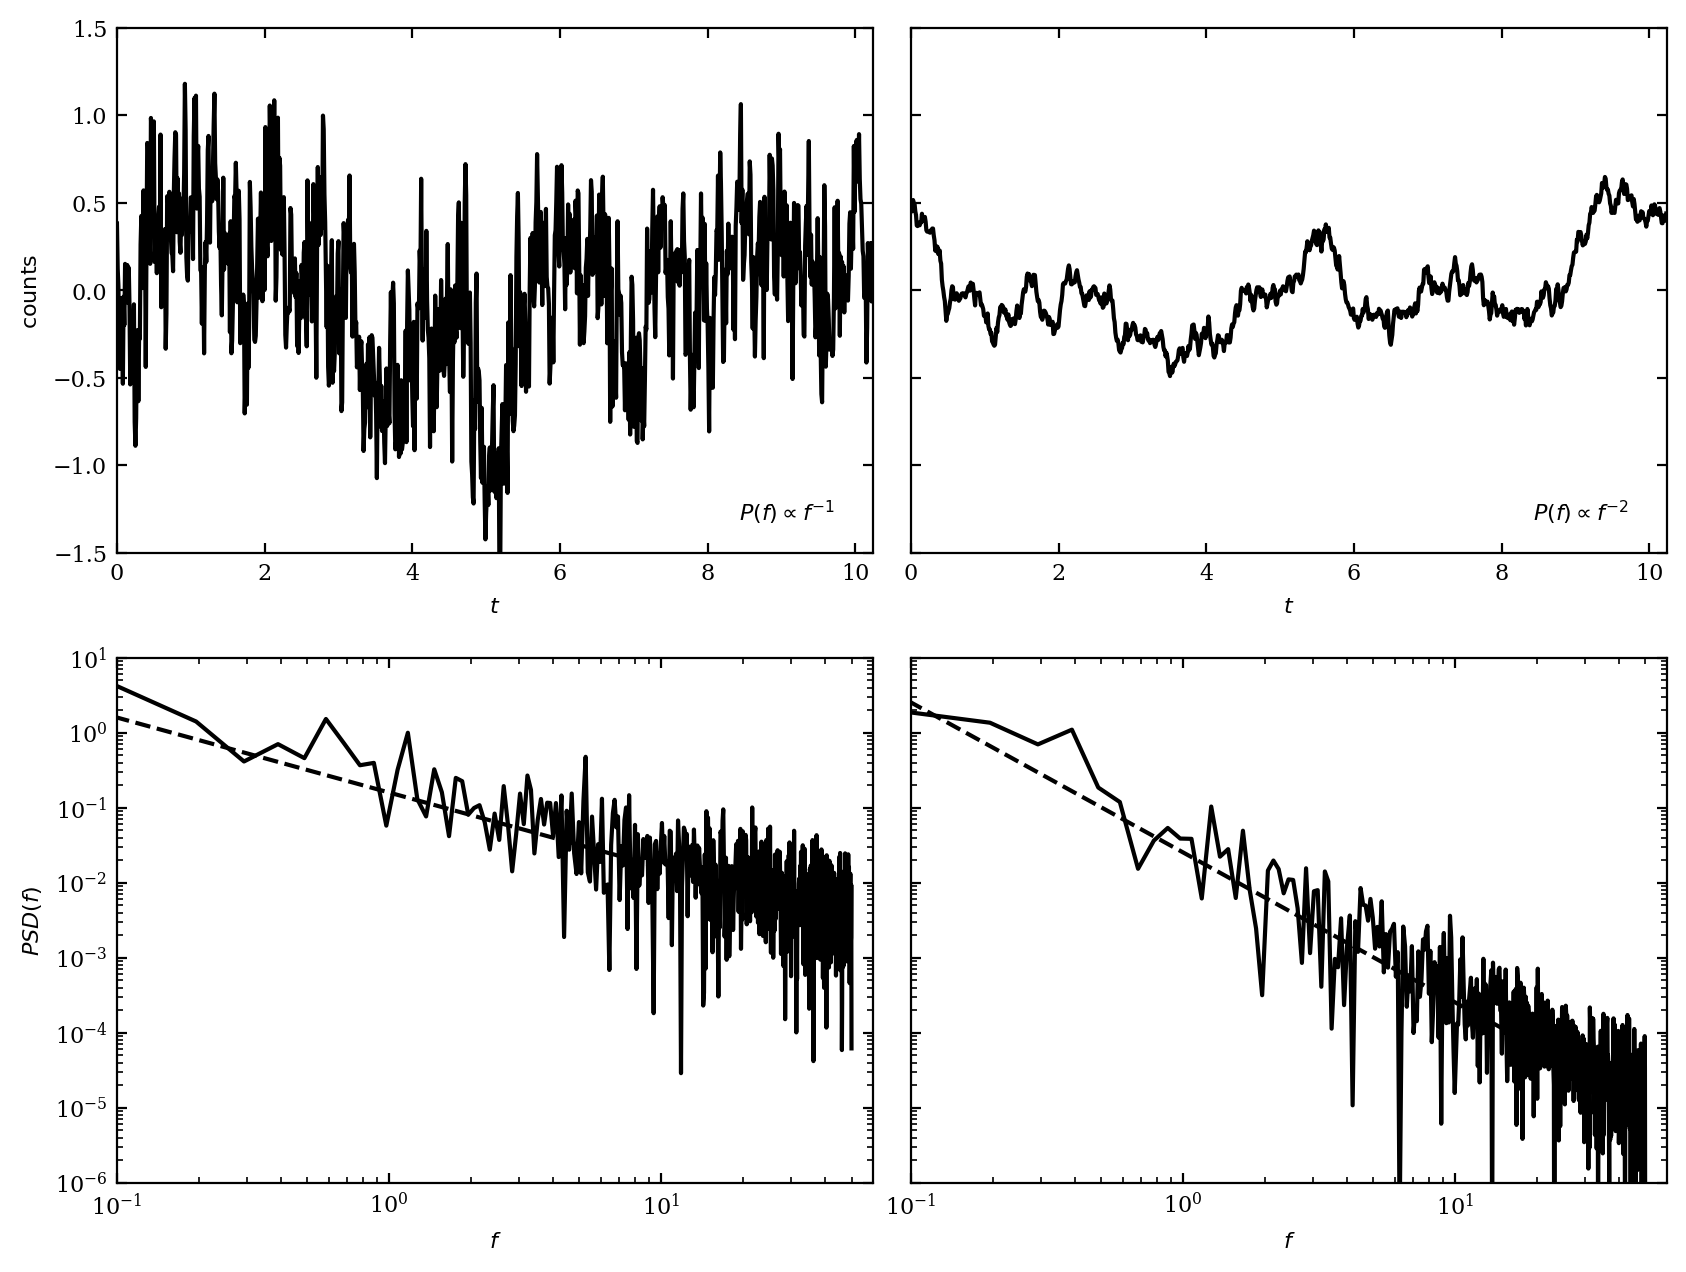

In [5]:
# Ivezic v2, Figure 10.29, edits by GTR and SRT
# Author: Jake VanderPlas
# License: BSD
#   The figure produced by this code is published in the textbook
#   "Statistics, Data Mining, and Machine Learning in Astronomy" (2013)
#   For more information, see http://astroML.github.com
#   To report a bug or issue, use the following forum:
#    https://groups.google.com/forum/#!forum/astroml-general
from astroML.time_series import generate_power_law
from astroML.fourier import PSD_continuous

#----------------------------------------------------------------------
# This function adjusts matplotlib settings for a uniform feel in the textbook.
# Note that with usetex=True, fonts are rendered with LaTeX.  This may
# result in an error if LaTeX is not installed on your system.  In that case,
# you can set usetex to False.
if "setup_text_plots" not in globals():
    from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=8, usetex=False)

N = 1024
dt = 0.01
factor = 100

t = dt * np.arange(N)
random_state = np.random.RandomState(1)

fig = plt.figure(figsize=(10, 7.5))
fig.subplots_adjust(wspace=0.05)

for i, beta in enumerate([1.0, 2.0]):
    # Generate the light curve and compute the PSD
    x = factor * generate_power_law(N, dt, beta, 
                                    random_state=random_state)
    f, PSD = PSD_continuous(t, x)

    # First axes: plot the time series
    ax1 = fig.add_subplot(221 + i)
    ax1.plot(t, x, '-k')

    ax1.text(0.95, 0.05, r"$P(f) \propto f^{-%i}$" % beta,
             ha='right', va='bottom', transform=ax1.transAxes)

    ax1.set_xlim(0, 10.24)
    ax1.set_ylim(-1.5, 1.5)

    ax1.set_xlabel(r'$t$')

    # Second axes: plot the PSD
    ax2 = fig.add_subplot(223 + i, 
                          xscale='log', 
                          yscale='log')
    ax2.plot(f, PSD, '-k')
    ax2.plot(f[1:], (factor * dt) ** 2 * (2 * np.pi * f[1:]) ** -beta, '--k')

    ax2.set_xlim(1E-1, 60)
    ax2.set_ylim(1E-6, 1E1)

    ax2.set_xlabel(r'$f$')

    if i == 1:
        ax1.yaxis.set_major_formatter(plt.NullFormatter())
        ax2.yaxis.set_major_formatter(plt.NullFormatter())
    else:
        ax1.set_ylabel(r'${\rm counts}$')
        ax2.set_ylabel(r'$PSD(f)$')

plt.show()

***But beware [spectral leakage](https://www.wikiwand.com/en/Spectral_leakage) from ["windowing"](https://www.wikiwand.com/en/Window_function#/Windowing) of your process!*** If the timescale of the process you are trying to characterize is longer (steeper negative slope PSD) than the window of data you have, then a naive periodogram or Fourier transform could run into problems. The PSD of the window function could be shallower than that of your process, leading to contamination. 

### ACF for Unevenly Sampled Data

astroML also has tools for **computing the ACF of *unevenly sampled* data** using two different methods: 
1. [Scargle method](https://ui.adsabs.harvard.edu/abs/1989ApJ...343..874S/abstract)
2. [Edelson & Krolik method](https://ui.adsabs.harvard.edu/abs/1988ESASP.281b.387E/abstract)

[http://www.astroml.org/modules/classes.html#module-astroML.time_series](http://www.astroml.org/modules/classes.html#module-astroML.time_series)

One of the tools is for generating a **damped random walk (DRW)**, which we recall is a process that "remembers" its history only for a characteristic time, $\tau$. The ACF vanishes for $\Delta t \gg \tau$.

*Warning below may require changing to astropy's LS periodogram function.*

In [6]:
# Syntax for EK and Scargle ACF computation
from astroML.time_series import generate_damped_RW
from astroML.time_series import ACF_scargle, ACF_EK

t = np.arange(0,1000)
y = generate_damped_RW(t, tau=300)
dy = 0.1
y = np.random.normal(y,dy)

ACF_scargle, bins_scargle = ACF_scargle(t,y,dy)
ACF_EK, ACF_err_EK, bins_EK = ACF_EK(t,y,dy)

        Use astropy.stats.LombScargle instead. [astroML.time_series.ACF]
        Use astropy.stats.LombScargle instead. [astroML.time_series.ACF]


<font color='red'>Figure 10.30 from the textbook gives an example of an ACF for a DRW, which mimics the variability that we might see from a *quasar whose lightcurve is unevenly sampled*.</font>

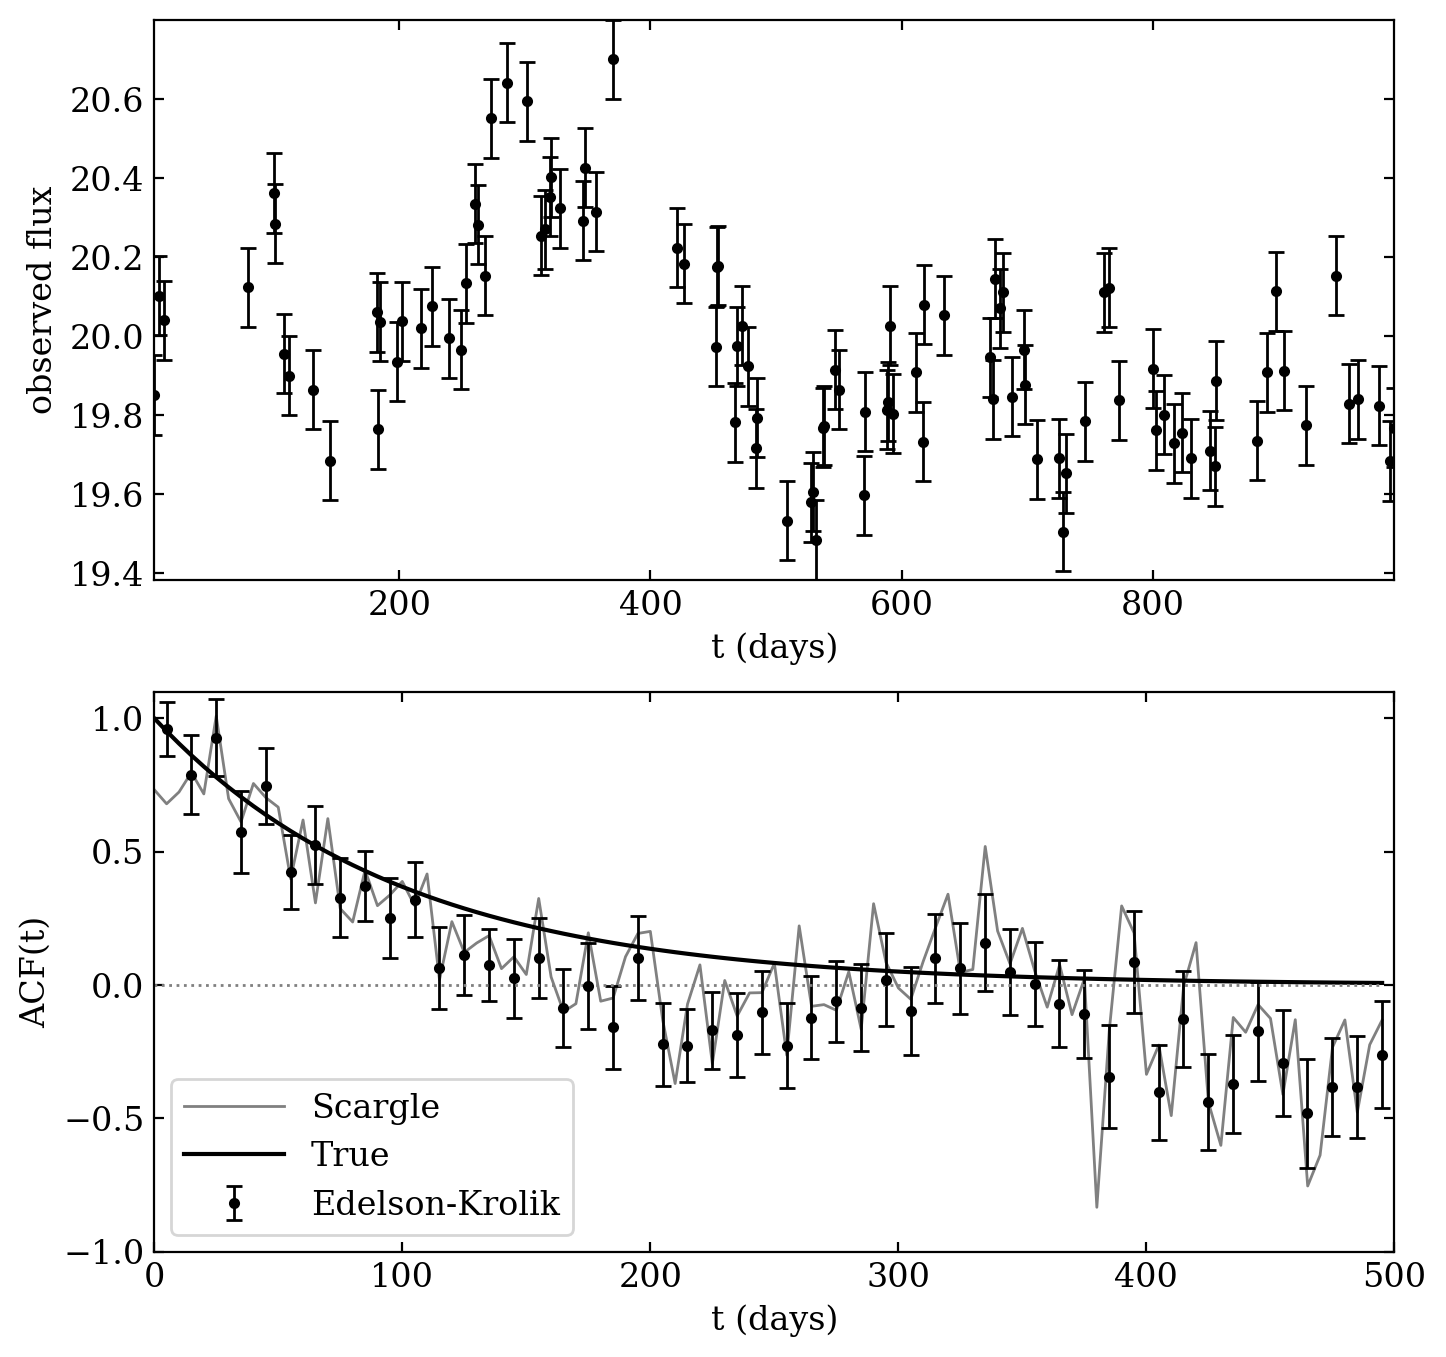

In [7]:
# Ivezic v2, Figure 10.30
# License: BSD
#   The figure produced by this code is published in the textbook
#   "Statistics, Data Mining, and Machine Learning in Astronomy" (2013)
#   For more information, see http://astroML.github.com
#   To report a bug or issue, use the following forum:
#    https://groups.google.com/forum/#!forum/astroml-general
from astroML.time_series import lomb_scargle, generate_damped_RW
from astroML.time_series import ACF_scargle, ACF_EK

#----------------------------------------------------------------------
# This function adjusts matplotlib settings for a uniform feel in the textbook.
# Note that with usetex=True, fonts are rendered with LaTeX.  This may
# result in an error if LaTeX is not installed on your system.  In that case,
# you can set usetex to False.
if "setup_text_plots" not in globals():
    from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=12, usetex=False)

#------------------------------------------------------------
# Generate time-series data:
#  we'll do 1000 days worth of magnitudes

t = np.arange(0, 1E3)
z = 2.0
tau = 300
tau_obs = tau / (1. + z)

np.random.seed(6)
y = generate_damped_RW(t, tau=tau, 
                       z=z, xmean=20)

# randomly sample 100 of these
ind = np.arange(len(t))
np.random.shuffle(ind)
ind = ind[:100]
ind.sort()
t = t[ind]
y = y[ind]

# add errors
dy = 0.1
y_obs = np.random.normal(y, dy)

#------------------------------------------------------------
# compute ACF via scargle method
C_S, t_S = ACF_scargle(t, y_obs, dy,
                       n_omega=2. ** 12, 
                       omega_max=np.pi / 5.0)

ind = (t_S >= 0) & (t_S <= 500)
t_S = t_S[ind]
C_S = C_S[ind]

#------------------------------------------------------------
# compute ACF via E-K method
C_EK, C_EK_err, bins = ACF_EK(t, y_obs, dy, 
                              bins=np.linspace(0, 500, 51))
t_EK = 0.5 * (bins[1:] + bins[:-1])

#------------------------------------------------------------
# Plot the results
fig = plt.figure(figsize=(8, 8))

# plot the input data
ax = fig.add_subplot(211)
ax.errorbar(t, y_obs, dy, fmt='.k', lw=1)
ax.set_xlabel('t (days)')
ax.set_ylabel('observed flux')

# plot the ACF
ax = fig.add_subplot(212)
ax.plot(t_S, C_S, '-', c='gray', lw=1,
        label='Scargle')
ax.errorbar(t_EK, C_EK, C_EK_err, fmt='.k', lw=1,
            label='Edelson-Krolik')
ax.plot(t_S, np.exp(-abs(t_S) / tau_obs), '-k', label='True')
ax.legend(loc=3)

ax.plot(t_S, 0 * t_S, ':', lw=1, c='gray')

ax.set_xlim(0, 500)
ax.set_ylim(-1.0, 1.1)

ax.set_xlabel('t (days)')
ax.set_ylabel('ACF(t)')

plt.show()

AstroML has [time series](http://www.astroml.org/modules/classes.html#module-astroML.time_series) and [Fourier](http://www.astroml.org/modules/classes.html#module-astroML.fourier) tools for generating light curves drawn from a power law in frequency space.  Note that these tools define $\beta = 1+2\alpha$, where $\alpha$ is the power-law index of the process' structure function, $\mathrm{SF}\propto t^\alpha$ (i.e., $\beta=2$ for a random walk). 

## Regression and Classification

Regression and Classification for these stochastic models is just the same as before.   With our model and model parameters, we can predict future values via regression, or look for similarities/differences as a function of the model parameters via clustering (unsupervised) or classification (supervised). Similarly, we can apply dimensionality reduction techniques to help visualize results from high-dimensional models.

Note that we have only discussed studying the statistical properties of stochastic processes in individual time series. **However, in pulsar-timing array searches for low-frequency gravitational waves, the target signal is a $\sim 1/f^{4}$ process that is present in each pulsar's time series, *and* correlated in a distinctive fashion across all the >50 pulsars that we monitor.** This is a big challenge, and one that my field has made big strides in for inter-object correlated time-series analysis. See [this](https://arxiv.org/abs/1407.1838) paper for a deep dive.

---

We have only scratched the surface of time-series analysis, and astrostatistics in general. Deeper dives and further tools involve the following:

- https://celerite.readthedocs.io/en/stable/
- [The Scargle Opus](https://ui.adsabs.harvard.edu/search/q=%20%20author%3A%22%5Escargle%22%20title%3A%22studies%20in%20astronomical%20time%22&sort=date%20desc%2C%20bibcode%20desc&p_=0)

However...

![](https://www.gryphon.dorset.sch.uk/wp-content/uploads/2020/07/maxresdefault.jpg)